# Pre-Processing

### 1. Clean Data

In [1]:
import pandas as pd

Read the file

In [2]:
raw_data = pd.read_csv("BREAST_DATA.csv")

Create a new dataframe with the features being included

In [3]:
included_columns = ['breast_cancer', 'agelevel', 'race7', 'cig_stat', 'cig_years', 'breast_fh_cnt', 'bmi_curc', 'asp', 'asppd', 
                    'ibup', 'ibuppd', 'bcontr_f', 'bcontrt', 'horm_stat', 'thorm', 'preg_f', 'fchilda', 'livec', 'fmenstr', 'lmenstr',
                    'menstrs', 'bbd', 'breast_eligible_bq', 'bq_returned']

In [4]:
clean_data = raw_data[included_columns].copy()

Drop records not eligible for Baseline Questionnaire Breast Analysis and that did not return the Baseline Questionnaire
- breast_eligible_bq: BQ Breast Analysis: Eligible? (0="No")
- bq_returned: Did the Participant Return the BQ? (0="No")

In [5]:
clean_data.drop(clean_data[clean_data['breast_eligible_bq'] == 0].index, inplace = True)
clean_data.drop(clean_data[clean_data['bq_returned'] == 0].index, inplace = True)

Drop features 'breast_eligible_bq' and 'bq_returned'

In [6]:
clean_data.drop(['breast_eligible_bq', 'bq_returned'], axis=1, inplace=True)

Drop records with missing or unknow values
- race7: Race (7="Missing")
- preg_f: Ever Been Pregnant? (2="Don't Know")
- horm_stat: Female Hormone Status (3="Unknown Whether Current Or Former", 4="Doesn't Know If She Ever Took HRT")

In [7]:
clean_data.drop(clean_data[clean_data['race7'] == 7].index, inplace = True)
clean_data.drop(clean_data[clean_data['preg_f'] == '2'].index, inplace = True)
clean_data.drop(clean_data[(clean_data['horm_stat'] == '3') | (clean_data['horm_stat'] == '4')].index, inplace = True)

Replace M="Not Answered" values by N="Not Applicable" where the question was not applicable based on previous response on the questionnaire
- cig_stat: Cigarette Smoking Status (0="Never Smoked Cigarettes")
- cig_years: Duration Smoked Cigarettes
<br><br>
- asp: Use Aspirin Regularly? (0="No")
- asppd: # of Aspirin
- ibup: Use Ibuprofen Regularly? (0="No")
- ibuppd: # of Ibuprofen
<br><br>
- preg_f: Ever Been Pregnant? (0="No")
- livec: # of Live Births
- fchilda: Age at Birth of First Child?
<br><br>
- bcontr_f: Ever Take Birth Control Pills? (0="No")
- bcontrt: Total Years Took Birth Control Pills?
<br><br>
- horm_stat: Female Hormone Status (0="Never")
- thorm: # of Years Taking Female Hormones

In [8]:
condition = (clean_data['cig_stat'] == '1') | (clean_data['cig_stat'] == '2')
clean_data.loc[condition, 'cig_years'] = clean_data.loc[condition, 'cig_years'].replace('M', 'N')

condition = (clean_data['asp'] == '0')
clean_data.loc[condition, 'asppd'] = clean_data.loc[condition, 'asppd'].replace('M', 'N')
condition = (clean_data['ibup'] == '0')
clean_data.loc[condition, 'ibuppd'] = clean_data.loc[condition, 'ibuppd'].replace('M', 'N')

condition = (clean_data['preg_f'] == '0')
clean_data.loc[condition, 'livec'] = clean_data.loc[condition, 'livec'].replace('M', 'N')
clean_data.loc[condition, 'fchilda'] = clean_data.loc[condition, 'fchilda'].replace('M', 'N') 

condition = (clean_data['bcontr_f'] == '0')
clean_data.loc[condition, 'bcontrt'] = clean_data.loc[condition, 'bcontrt'].replace('M', 'N')

condition = (clean_data['horm_stat'] == '0')
clean_data.loc[condition, 'thorm'] = clean_data.loc[condition, 'thorm'].replace('M', 'N')

- Drop feature asp (Use Aspirin Regularly?) since it is represented by asppd (# of Aspirin)
- Drop feature ibup (Use Ibuprofen Regularly?) since it is represented by ibuppd (# of Ibuprofen)
- Drop feature preg_f (Ever Been Pregnant?) since it is represented by pregc (# of Pregnancies)
- Drop feature bcontr_f (Ever Take Birth Control Pills?) since it is represented by bcontrt (Total Years Took Birth Control Pills?))

In [9]:
clean_data.drop(['asp', 'ibup', 'preg_f', 'bcontr_f'], axis=1, inplace=True)

Replace values of N="Not Applicable" with numeric value

In [10]:
clean_data['cig_years'].replace(to_replace='N', value=0, inplace=True)
clean_data['livec'].replace(to_replace='N', value=0, inplace=True)
clean_data['fchilda'].replace(to_replace='N', value=0, inplace=True)
clean_data['bcontrt'].replace(to_replace='N', value=0, inplace=True)
clean_data['thorm'].replace(to_replace='N', value=0, inplace=True)

Drop any record that contain a missing code
- A=Ambiguous
- M=Missing/Not Answered
- R=Out of Range

In [11]:
for feature_name in clean_data:
    condition = (clean_data[feature_name] == 'A') | (clean_data[feature_name] == 'M') | (clean_data[feature_name] == 'R') 
    clean_data.drop(clean_data[condition].index, inplace = True)

Convert all features to be of numeric data types

In [12]:
for feature_name in clean_data:
    try:
        clean_data[feature_name] = clean_data[feature_name].astype(str).astype(int)
    except:
        clean_data[feature_name] = clean_data[feature_name].astype(str).astype(float)

#### Data Visualization


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a copy of the clean data for the data visualization

In [14]:
data_vis = clean_data.copy()

Create a table showing the count and percentage of negative and positive records of confirmed breast cancer (class label)

In [15]:
data_vis['breast_cancer'].replace({0: 'negative', 1: 'positive'}, inplace=True)
class_label = data_vis['breast_cancer']

neg_count = (class_label == 'negative').sum()
neg_pct = (neg_count/len(class_label))*100
pos_count = (class_label == 'positive').sum()
pos_pct = (pos_count/len(class_label))*100

data = {'Count': [neg_count, pos_count, neg_count+pos_count], 'Percentage': [neg_pct, pos_pct, neg_pct+pos_pct]}
class_table = pd.DataFrame(data=data, index=['Negative', 'Positive', 'Total'])
class_table['Percentage'] = class_table['Percentage'].round(decimals = 2)
class_table


,Count,Percentage
Negative,61966,94.03
Positive,3936,5.97
Total,65902,100.00


Create a diagram to show the distribution of the class label

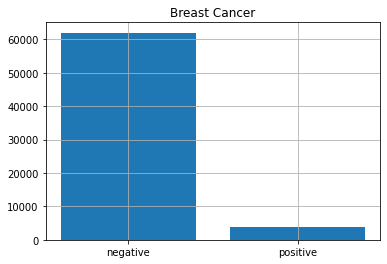

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(class_label.unique(), class_label.value_counts())
ax.set_title("Breast Cancer")
ax.set_xticks(class_label.unique())
ax.grid(b=True)

Create a function to show the distribution of the class label based on a feature in the dataset

In [17]:
def display_grouped_barplot(feature_name, feature_desc, replace_vals, dataset, rotation):
    ticks_idx = np.arange(len(dataset[feature_name].unique()))
    ylabels = ['negative', 'positive']
    by_group = dataset.groupby([feature_name])['breast_cancer'].value_counts()
    by_group.unstack().plot(kind='bar', stacked=True)
    plt.legend(ylabels)
    plt.xlabel(feature_desc)
    plt.xticks(ticks_idx, replace_vals, rotation=rotation)
    plt.show()

Display a diagram of the distribution of the class label based on each feature in the dataset

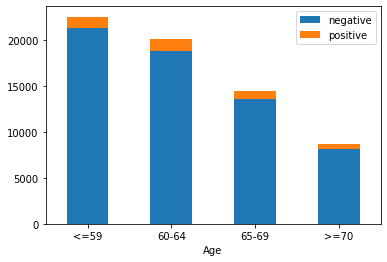

In [18]:
display_grouped_barplot('agelevel', 'Age', ['<=59', '60-64', '65-69', '>=70'], data_vis, 'horizontal')

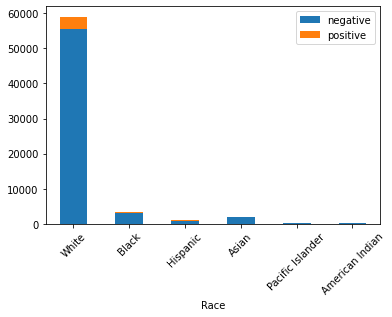

In [19]:
display_grouped_barplot('race7', 'Race', ['White', 'Black', 'Hispanic', 'Asian', 'Pacific Islander', 'American Indian'], data_vis, 45)

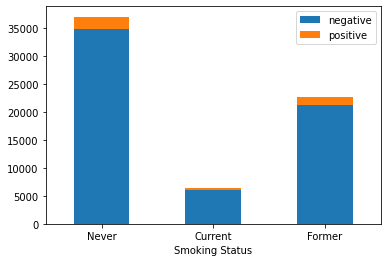

In [20]:
display_grouped_barplot('cig_stat', 'Smoking Status', ['Never', 'Current', 'Former'], data_vis, 'horizontal')

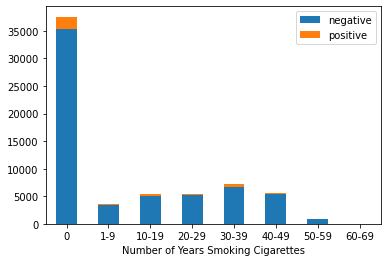

In [21]:
data_vis['cig_years'] = pd.cut(data_vis['cig_years'], bins=[0, 1, 10, 20, 30, 40, 50, 60, 70], right=False)
display_grouped_barplot('cig_years', 'Number of Years Smoking Cigarettes', ['0', '1-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'], data_vis, 'horizontal')

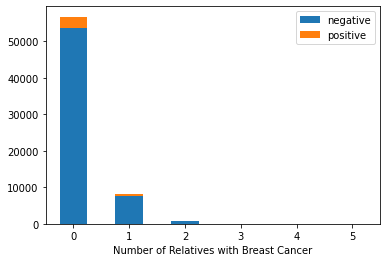

In [22]:
display_grouped_barplot('breast_fh_cnt', 'Number of Relatives with Breast Cancer', ['0', '1', '2', '3', '4', '5'], data_vis, 'horizontal')

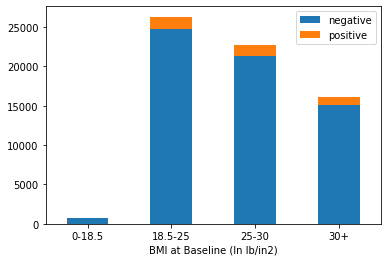

In [23]:
display_grouped_barplot('bmi_curc', 'BMI at Baseline (In lb/in2)', ['0-18.5', '18.5-25', '25-30', '30+'], data_vis, 'horizontal')

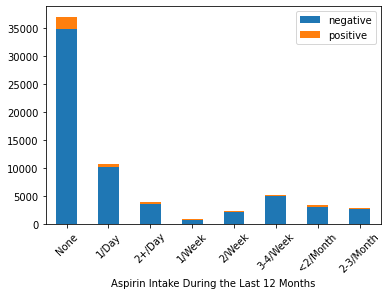

In [24]:
display_grouped_barplot('asppd', 'Aspirin Intake During the Last 12 Months', ['None', '1/Day', '2+/Day', '1/Week', '2/Week', '3-4/Week', '<2/Month', '2-3/Month'], data_vis, 45)

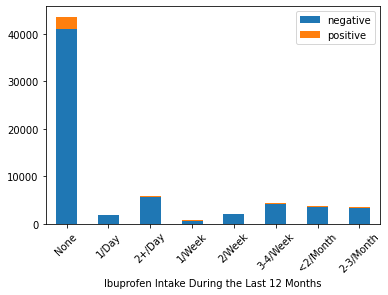

In [25]:
display_grouped_barplot('ibuppd', 'Ibuprofen Intake During the Last 12 Months', ['None', '1/Day', '2+/Day', '1/Week', '2/Week', '3-4/Week', '<2/Month', '2-3/Month'], data_vis, 45)

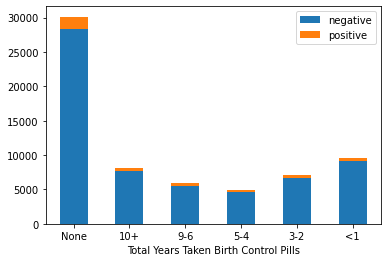

In [26]:
display_grouped_barplot('bcontrt', 'Total Years Taken Birth Control Pills', ['None', '10+', '9-6', '5-4', '3-2', '<1'], data_vis, 'horizontal')

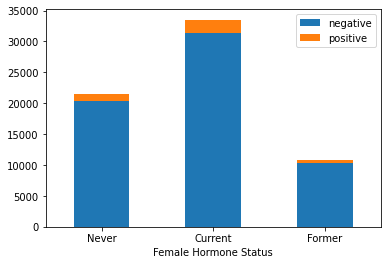

In [27]:
display_grouped_barplot('horm_stat', 'Female Hormone Status', ['Never', 'Current', 'Former'], data_vis, 'horizontal')

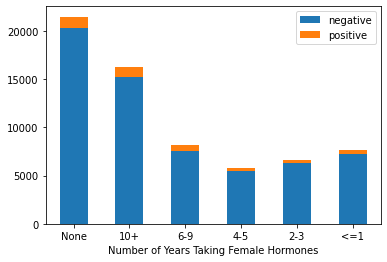

In [28]:
display_grouped_barplot('thorm', 'Number of Years Taking Female Hormones', ['None', '10+', '6-9', '4-5', '2-3', '<=1'], data_vis, 'horizontal')

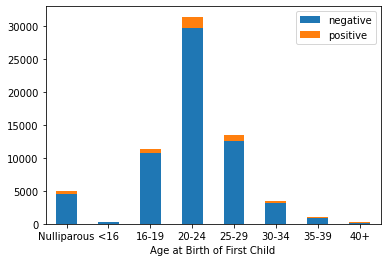

In [29]:
display_grouped_barplot('fchilda', 'Age at Birth of First Child', ['Nulliparous', '<16', '16-19', '20-24', '25-29', '30-34', '35-39', '40+'], data_vis, 'horizontal')

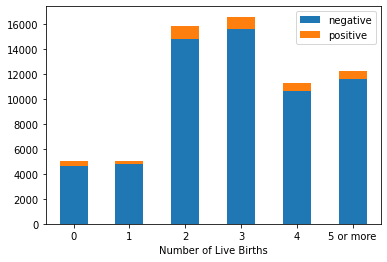

In [30]:
display_grouped_barplot('livec', 'Number of Live Births', ['0', '1', '2', '3', '4', '5 or more'], data_vis, 'horizontal')

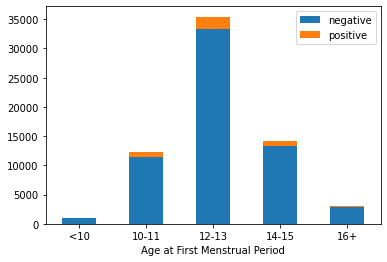

In [31]:
display_grouped_barplot('fmenstr', 'Age at First Menstrual Period', ['<10', '10-11', '12-13', '14-15', '16+'], data_vis, 'horizontal')

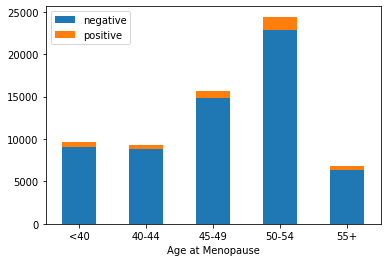

In [32]:
display_grouped_barplot('lmenstr', 'Age at Menopause', ['<40', '40-44', '45-49', '50-54', '55+'], data_vis, 'horizontal')

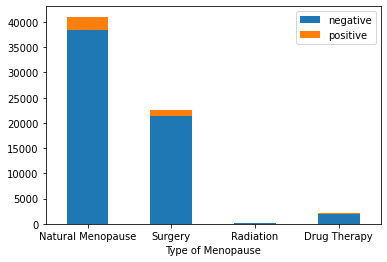

In [33]:
display_grouped_barplot('menstrs', 'Type of Menopause', ['Natural Menopause', 'Surgery', 'Radiation', 'Drug Therapy'], data_vis, 'horizontal')

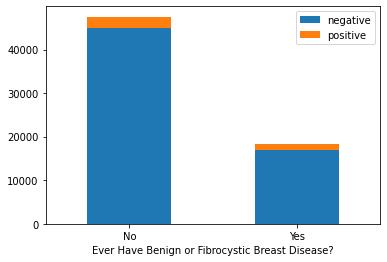

In [34]:
display_grouped_barplot('bbd', 'Ever Have Benign or Fibrocystic Breast Disease?', ['No', 'Yes'], data_vis, 'horizontal')

Display a heatmap of the correlation between the features

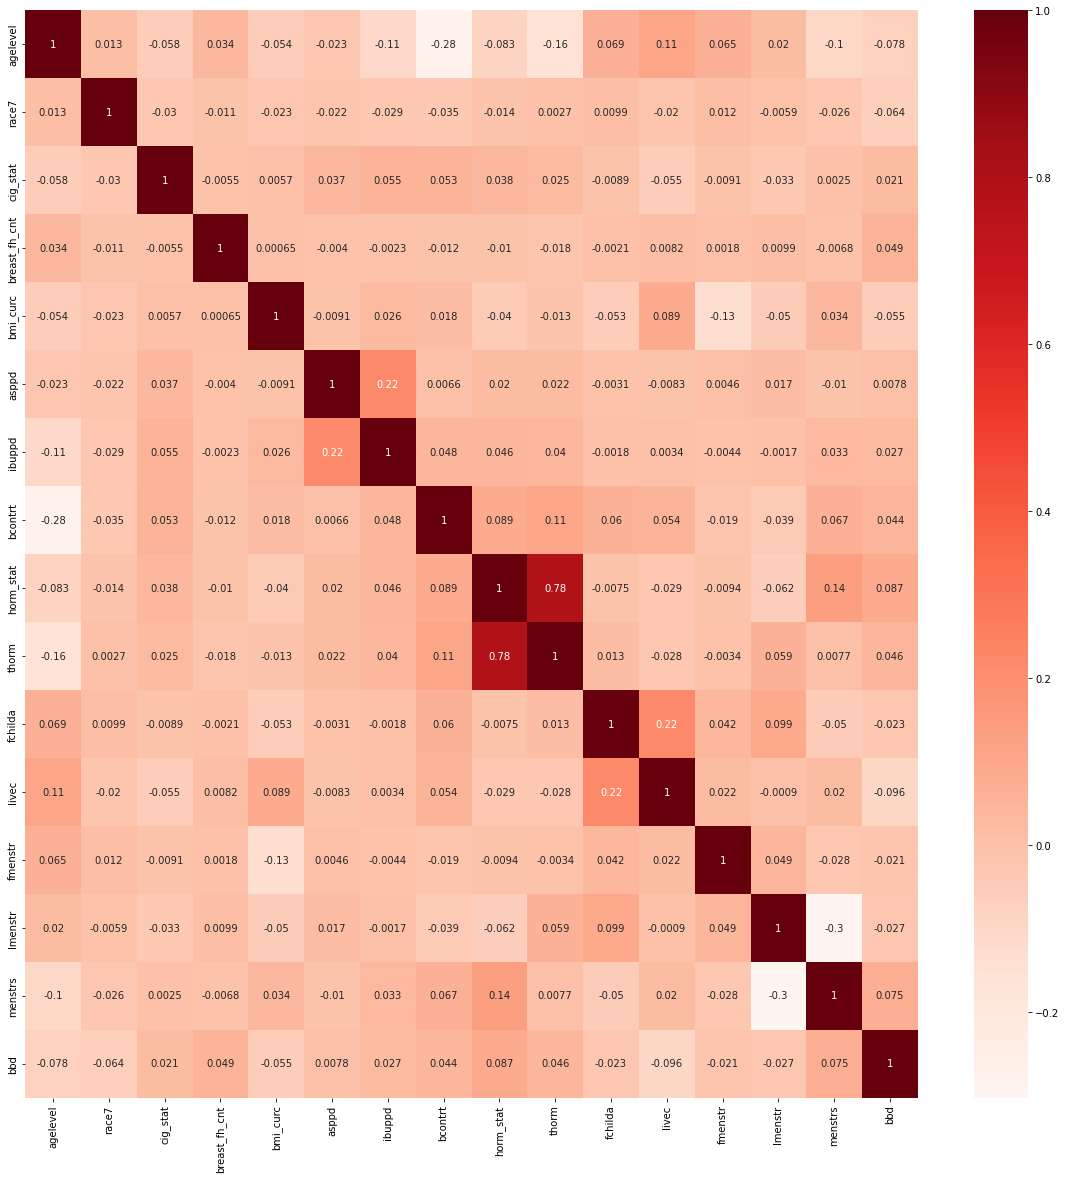

In [35]:
plt.figure(figsize=(20,20))
cor = data_vis.drop('breast_cancer', axis=1).corr()
sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 2. Split Data

Split the data into two parts
- Testing data = 30%
- Traing data = 70%

In [36]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1234

Separate the class label (breast_cancer) from the other features

In [37]:
y_clean = clean_data['breast_cancer']
X_clean = clean_data.drop('breast_cancer', axis=1)

Split data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3,random_state=RANDOM_STATE, stratify=y_clean)

### 3. Normalize Data

In [39]:
from sklearn.preprocessing import MinMaxScaler

Normalize the training data between 0 and 1

In [40]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_array = scaler.transform(X_train)
X_train = pd.DataFrame(X_array, columns=X_train.columns)

Normalize the testing data between 0 and 1

In [41]:
X_array = scaler.transform(X_test)
X_test = pd.DataFrame(X_array, columns=X_test.columns)

# Model Training

In [42]:
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [43]:
def transform_params(classifier_name, params):
    new_parms = []
    for dictionary in params:
        for param_name in dictionary:
            new_name = classifier_name+'__'+param_name
            new_parms.append({new_name: dictionary[param_name]})
    return new_parms

#### Support Vector Machine

Define the hyperparameters to use when optimizing the SVM models

In [44]:
params = [
  {'kernel': ['linear', 'rbf']},
  {'kernel': ['poly'], 'degree': [2, 3, 4]}
 ]

Perform a grid search using the original data

In [45]:
best_svc_orig = GridSearchCV(SVC(random_state=RANDOM_STATE), param_grid=params, cv=5, scoring='f1')
best_svc_orig.fit(X_train, y_train)
best_svc_orig.best_params_

{'kernel': 'linear'}

In [46]:
print('SVM: best f1-score using original data: '+str(best_svc_orig.best_score_))

SVM: best f1-score using original data: 0.0


Transform the parameters so they can be used in the pipeline

In [47]:
t_params = transform_params('svc', params)

Perform a grid search using oversampled data

In [48]:
imba_pipeline = make_pipeline(RandomOverSampler(random_state=RANDOM_STATE), SVC(random_state=RANDOM_STATE))
best_svc_over = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_svc_over.fit(X_train, y_train)
best_svc_over.best_params_

{'svc__kernel': 'linear'}

In [49]:
print('SVM: best f1-score using oversampled data: '+str(best_svc_over.best_score_))

SVM: best f1-score using oversampled data: 0.1263946027220623


Perform a grid search using undersampled data

In [50]:
imba_pipeline = make_pipeline(RandomUnderSampler(random_state=RANDOM_STATE), SVC(random_state=RANDOM_STATE))
best_svc_under = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_svc_under.fit(X_train, y_train)
best_svc_under.best_params_

{'svc__kernel': 'poly'}

In [51]:
print('SVM: best f1-score using undersampled data: '+str(best_svc_under.best_score_))

SVM: best f1-score using undersampled data: 0.12597996814214152


Perform a grid search using over- and undersampled data

In [52]:
imba_pipeline = make_pipeline(SMOTEENN(random_state=RANDOM_STATE), SVC(random_state=RANDOM_STATE))
best_svc_hybrid = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_svc_hybrid.fit(X_train, y_train)
best_svc_hybrid.best_params_

{'svc__kernel': 'rbf'}

In [53]:
print('SVM: best f1-score using over- and undersampled data: '+str(best_svc_hybrid.best_score_))

SVM: best f1-score using over- and undersampled data: 0.11559332024837406


#### Gaussian Naïve Bayes Classifier

Define the hyperparameters to use when optimizing the GNB models

In [54]:
params = [{'var_smoothing': [0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001]}]

Perform a grid search using the original data

In [55]:
best_gnb_orig = GridSearchCV(GaussianNB(), param_grid=params, cv=5, scoring='f1')
best_gnb_orig.fit(X_train, y_train)
best_gnb_orig.best_params_

{'var_smoothing': 1e-07}

In [56]:
print('GNB: best f1-score using original data: '+str(best_gnb_orig.best_score_))

GNB: best f1-score using original data: 0.040283530505245725


Transform the parameters so they can be used in the pipeline

In [57]:
t_params = transform_params('gaussiannb', params)

Perform a grid search using oversampled data

In [58]:
imba_pipeline = make_pipeline(RandomOverSampler(random_state=RANDOM_STATE), GaussianNB())
best_gnb_over = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_gnb_over.fit(X_train, y_train)
best_gnb_over.best_params_

{'gaussiannb__var_smoothing': 1e-07}

In [59]:
print('GNB: best f1-score using oversampled data: '+str(best_gnb_over.best_score_))

GNB: best f1-score using oversampled data: 0.1318814664069086


Perform a grid search using undersampled data

In [60]:
imba_pipeline = make_pipeline(RandomUnderSampler(random_state=RANDOM_STATE), GaussianNB())
best_gnb_under = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_gnb_under.fit(X_train, y_train)
best_gnb_under.best_params_

{'gaussiannb__var_smoothing': 1e-07}

In [61]:
print('GNB: best f1-score using undersampled data: '+str(best_gnb_under.best_score_))

GNB: best f1-score using undersampled data: 0.1314230629969239


Perform a grid search using over- and undersampled data

In [62]:
imba_pipeline = make_pipeline(SMOTEENN(random_state=RANDOM_STATE), GaussianNB())
best_gnb_hybrid = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_gnb_hybrid.fit(X_train, y_train)
best_gnb_hybrid.best_params_

{'gaussiannb__var_smoothing': 1e-07}

In [63]:
print('GNB: best f1-score using over- and undersampled data: '+str(best_gnb_hybrid.best_score_))

GNB: best f1-score using over- and undersampled data: 0.11663889064352292


##### Desicion Tree Classifer

Define the hyperparameters to use when optimizing the DT models

In [64]:
params = [
  {'max_depth': [2, 5, 10], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2]},
  {'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2]}
 ]

Perform a grid search on the original dataset

In [65]:
best_dtc_orig = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), param_grid=params, cv=5, scoring='f1')
best_dtc_orig.fit(X_train, y_train)
best_dtc_orig.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [66]:
print('DT: best f1-score using original data: '+str(best_dtc_orig.best_score_))

DT: best f1-score using original data: 0.07660953831054504


Transform the parameters so they can be used in the pipeline

In [67]:
t_params = transform_params('decisiontreeclassifier', params)

Perform a grid search using oversampled data

In [68]:
imba_pipeline = make_pipeline(RandomOverSampler(random_state=RANDOM_STATE), DecisionTreeClassifier(random_state=RANDOM_STATE))
best_dtc_over = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_dtc_over.fit(X_train, y_train)
best_dtc_over.best_params_

{'decisiontreeclassifier__max_depth': 2}

In [69]:
print('DT: best f1-score using oversampled data: '+str(best_dtc_over.best_score_))

DT: best f1-score using oversampled data: 0.13199930529696832


Perform a grid search using oversampled data

In [70]:
imba_pipeline = make_pipeline(RandomUnderSampler(random_state=RANDOM_STATE), DecisionTreeClassifier(random_state=RANDOM_STATE))
best_dtc_under = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_dtc_under.fit(X_train, y_train)
best_dtc_under.best_params_

{'decisiontreeclassifier__max_depth': 2}

In [71]:
print('DT: best f1-score using undersampled data: '+str(best_dtc_under.best_score_))

DT: best f1-score using undersampled data: 0.13017420414641517


Perform a grid search using over- and undersampled data

In [72]:
imba_pipeline = make_pipeline(SMOTEENN(random_state=RANDOM_STATE), DecisionTreeClassifier(random_state=RANDOM_STATE))
best_dtc_hybrid = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_dtc_hybrid.fit(X_train, y_train)
best_dtc_hybrid.best_params_

{'decisiontreeclassifier__max_depth': 2}

In [73]:
print('DT: best f1-score using over- and undersampled data: '+str(best_dtc_hybrid.best_score_))

DT: best f1-score using over- and undersampled data: 0.11029156131332507


#### Random Forest

Define the hyperparameters to use when optimizing the RF models

In [74]:
params = [
  {'n_estimators': [50, 100, 200], 'max_depth': [2, 5, 10], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2]},
  {'n_estimators': [50, 100, 200], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2]}
 ]

Perform a grid search on the original dataset

In [75]:
best_rf_orig = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), param_grid=params, cv=5, scoring='f1')
best_rf_orig.fit(X_train, y_train)
best_rf_orig.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [76]:
print('RF: best f1-score using original data: '+str(best_rf_orig.best_score_))

RF: best f1-score using original data: 0.004232861333990538


Transform the parameters so they can be used in the pipeline

In [77]:
t_params = transform_params('randomforestclassifier', params)

Perform a grid search using oversampled data

In [78]:
imba_pipeline = make_pipeline(RandomOverSampler(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE))
best_rf_over = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_rf_over.fit(X_train, y_train)
best_rf_over.best_params_

{'randomforestclassifier__max_depth': 5}

In [79]:
print('RF: best f1-score using oversampled data: '+str(best_rf_over.best_score_))

RF: best f1-score using oversampled data: 0.13304811863644705


Perform a grid search using undersampled data

In [80]:
imba_pipeline = make_pipeline(RandomUnderSampler(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE))
best_rf_under = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_rf_under.fit(X_train, y_train)
best_rf_under.best_params_

{'randomforestclassifier__max_depth': 5}

In [81]:
print('RF: best f1-score using undersampled data: '+str(best_rf_under.best_score_))

RF: best f1-score using undersampled data: 0.13153868186149661


Perform a grid search using over- and undersampled data

In [82]:
imba_pipeline = make_pipeline(SMOTEENN(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE))
best_rf_hybrid = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_rf_hybrid.fit(X_train, y_train)
best_rf_hybrid.best_params_

{'randomforestclassifier__max_depth': 5}

In [83]:
print('RF: best f1-score using over- and undersampled data: '+str(best_rf_hybrid.best_score_))

RF: best f1-score using over- and undersampled data: 0.12240907780006224


#### Extreme Gradient Boosting Classifier

Define the hyperparameters to use when optimizing the XGBoost models

In [84]:
params = [{'n_estimators': [50, 100, 200], 'max_depth': [5, 6, 7], 'learning_rate': [0.1, 0.3, 0.5]}]

Perform a grid search using the original data

In [85]:
best_xgb_orig = GridSearchCV(XGBClassifier(verbosity=0, use_label_encoder=False, random_state=RANDOM_STATE), param_grid=params, cv=5, scoring='f1')
best_xgb_orig.fit(X_train, y_train)
best_xgb_orig.best_params_

{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}

In [86]:
print('XGBoost: best f1-score using original data: '+str(best_xgb_orig.best_score_))

XGBoost: best f1-score using original data: 0.02180429932688773


Transform the parameters so they can be used in the pipeline

In [87]:
t_params = transform_params('xgbclassifier', params)

Perform a grid search using oversampled data

In [88]:
imba_pipeline = make_pipeline(RandomOverSampler(random_state=RANDOM_STATE), XGBClassifier(verbosity=0, use_label_encoder=False, random_state=RANDOM_STATE))
best_xgb_over = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_xgb_over.fit(X_train, y_train)
best_xgb_over.best_params_

{'xgbclassifier__n_estimators': 50}

In [89]:
print('XGBoost: best f1-score using oversampled data: '+str(best_xgb_over.best_score_))

XGBoost: best f1-score using oversampled data: 0.12405387834919546


Perform a grid search using undersampled data

In [90]:
imba_pipeline = make_pipeline(RandomUnderSampler(random_state=RANDOM_STATE), XGBClassifier(verbosity=0, use_label_encoder=False, random_state=RANDOM_STATE))
best_xgb_under = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_xgb_under.fit(X_train, y_train)
best_xgb_under.best_params_

{'xgbclassifier__learning_rate': 0.1}

In [91]:
print('XGBoost: best f1-score using undersampled data: '+str(best_xgb_under.best_score_))

XGBoost: best f1-score using undersampled data: 0.12268628593918529


Perform a grid search using over- and undersampled data

In [92]:
imba_pipeline = make_pipeline(SMOTEENN(random_state=RANDOM_STATE), XGBClassifier(verbosity=0, use_label_encoder=False, random_state=RANDOM_STATE))
best_xgb_hybrid = GridSearchCV(imba_pipeline, param_grid=t_params, cv=5, scoring='f1')
best_xgb_hybrid.fit(X_train, y_train)
best_xgb_hybrid.best_params_

{'xgbclassifier__learning_rate': 0.5}

In [93]:
print('XGBoost: best f1-score using over- and undersampled data: '+str(best_xgb_hybrid.best_score_))

XGBoost: best f1-score using over- and undersampled data: 0.022754111042833928


### Model Testing

#### Support Vector Machine

Predict the values of the test data for each SVM model trained on different datasets

In [94]:
y_predict_svc_orig = best_svc_orig.predict(X_test)
y_predict_svc_over = best_svc_over.predict(X_test)
y_predict_svc_under = best_svc_under.predict(X_test)
y_predict_svc_hybrid = best_svc_hybrid.predict(X_test)

#### Gaussian Naïve Bayes Classifier

Predict the values of the test data for each GNB model trained on different datasets

In [95]:
y_predict_gnb_orig = best_gnb_orig.predict(X_test)
y_predict_gnb_over = best_gnb_over.predict(X_test)
y_predict_gnb_under = best_gnb_under.predict(X_test)
y_predict_gnb_hybrid = best_gnb_hybrid.predict(X_test)

##### Desicion Tree Classifer

Predict the values of the test data for each DT model trained on different datasets

In [96]:
y_predict_dtc_orig = best_dtc_orig.predict(X_test)
y_predict_dtc_over = best_dtc_over.predict(X_test)
y_predict_dtc_under = best_dtc_under.predict(X_test)
y_predict_dtc_hybrid = best_dtc_hybrid.predict(X_test)

#### Random Forest

Predict the values of the test data for each RF model trained on different datasets

In [97]:
y_predict_rf_orig = best_rf_orig.predict(X_test)
y_predict_rf_over = best_rf_over.predict(X_test)
y_predict_rf_under = best_rf_under.predict(X_test)
y_predict_rf_hybrid = best_rf_hybrid.predict(X_test)

#### Extreme Gradient Boosting Classifier

Predict the values of the test data for each XGBoost model trained on different datasets

In [98]:
y_predict_xgb_orig = best_xgb_orig.predict(X_test)
y_predict_xgb_over = best_xgb_over.predict(X_test)
y_predict_xgb_under = best_xgb_under.predict(X_test)
y_predict_xgb_hybrid = best_xgb_hybrid.predict(X_test)

### Model Evaluation

#### 1. Predictive Performance Metrics

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from IPython.display import display

Create a function to display a table of the metric scores for the same type of model, but trained on different datasets

In [100]:
def display_score_table(metric_name, scores):
    scores_df = pd.DataFrame({'Trained on Dataset': ['Original', 'Oversampled', 'UnderSampled', 'Over- and Undersampled'], metric_name: scores})
    display(scores_df)

Create a function to display a confusion matrix

In [101]:
def display_confusion_matrix(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    d = {'Predicted Positive': [tp, fp], 'Predicted Negative': [fn, tn]}
    cm = pd.DataFrame(data=d, index=['Actual Positive', 'Actual Negative'])
    display(cm)


#### Support Vector Machine

Display the confusion matrix for the SVM model trained on the original dataset

In [102]:
display_confusion_matrix(y_test, y_predict_svc_orig)

,Predicted Positive,Predicted Negative
Actual Positive,0,1181
Actual Negative,0,18590


Display the confusion matrix for the SVM model trained on the oversampled dataset

In [103]:
display_confusion_matrix(y_test, y_predict_svc_over)

,Predicted Positive,Predicted Negative
Actual Positive,401,780
Actual Negative,5112,13478


Display the confusion matrix for the SVM model trained on the undersampled dataset

In [104]:
display_confusion_matrix(y_test, y_predict_svc_under)

,Predicted Positive,Predicted Negative
Actual Positive,588,593
Actual Negative,7619,10971


Display the confusion matrix for the SVM model trained on the over- and undersampled dataset

In [105]:
display_confusion_matrix(y_test, y_predict_svc_hybrid)

,Predicted Positive,Predicted Negative
Actual Positive,687,494
Actual Negative,9812,8778


Display the accuracy scores for the SVM models trained on different datasets

In [106]:
accuracy_svc_orig = accuracy_score(y_test, y_predict_svc_orig)
accuracy_svc_over = accuracy_score(y_test, y_predict_svc_over)
accuracy_svc_under = accuracy_score(y_test, y_predict_svc_under)
accuracy_svc_hybrid = accuracy_score(y_test, y_predict_svc_hybrid)
display_score_table('Accuracy', [accuracy_svc_orig, accuracy_svc_over, accuracy_svc_under, accuracy_svc_hybrid])

,Trained on Dataset,Accuracy
0,Original,0.940266
1,Oversampled,0.701988
2,UnderSampled,0.584644
3,Over- and Undersampled,0.478731


Display the recall for the SVM models trained on different datasets

In [107]:
recall_svc_orig = recall_score(y_test, y_predict_svc_orig)
recall_svc_over = recall_score(y_test, y_predict_svc_over)
recall_svc_under = recall_score(y_test, y_predict_svc_under)
recall_svc_hybrid = recall_score(y_test, y_predict_svc_hybrid)
display_score_table('Recall', [recall_svc_orig, recall_svc_over, recall_svc_under, recall_svc_hybrid])

,Trained on Dataset,Recall
0,Original,0.000000
1,Oversampled,0.339543
2,UnderSampled,0.497883
3,Over- and Undersampled,0.581710


Display the precision scores for the SVM models trained on different datasets

In [108]:
precision_svc_orig = precision_score(y_test, y_predict_svc_orig)
precision_svc_over = precision_score(y_test, y_predict_svc_over)
precision_svc_under = precision_score(y_test, y_predict_svc_under)
precision_svc_hybrid = precision_score(y_test, y_predict_svc_hybrid)
display_score_table('Precision', [precision_svc_orig, precision_svc_over, precision_svc_under, precision_svc_hybrid])

C:\Users\sigri\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Trained on Dataset,Precision
0,Original,0.000000
1,Oversampled,0.072737
2,UnderSampled,0.071646
3,Over- and Undersampled,0.065435


Display the F1 scores for the SVM models trained on different datasets

In [109]:
f1_svc_orig = f1_score(y_test, y_predict_svc_orig)
f1_svc_over = f1_score(y_test, y_predict_svc_over)
f1_svc_under = f1_score(y_test, y_predict_svc_under)
f1_svc_hybrid = f1_score(y_test, y_predict_svc_hybrid)
display_score_table('F1', [f1_svc_orig, f1_svc_over, f1_svc_under, f1_svc_hybrid])

,Trained on Dataset,F1
0,Original,0.000000
1,Oversampled,0.119809
2,UnderSampled,0.125266
3,Over- and Undersampled,0.117637


Display the F2 scores for the SVM models trained on different datasets

In [110]:
f2_svc_orig = fbeta_score(y_test, y_predict_svc_orig, beta=2)
f2_svc_over = fbeta_score(y_test, y_predict_svc_over, beta=2)
f2_svc_under = fbeta_score(y_test, y_predict_svc_under, beta=2)
f2_svc_hybrid = fbeta_score(y_test, y_predict_svc_hybrid, beta=2)
display_score_table('F2', [f2_svc_orig, f2_svc_over, f2_svc_under, f2_svc_hybrid])

,Trained on Dataset,F2
0,Original,0.000000
1,Oversampled,0.195858
2,UnderSampled,0.227361
3,Over- and Undersampled,0.225645


Display the AUC scores for the SVM models trained on different datasets

In [111]:
auc_svc_orig = roc_auc_score(y_test, y_predict_svc_orig)
auc_svc_over = roc_auc_score(y_test, y_predict_svc_over)
auc_svc_under = roc_auc_score(y_test, y_predict_svc_under)
auc_svc_hybrid = roc_auc_score(y_test, y_predict_svc_hybrid)
display_score_table('AUC', [auc_svc_orig, auc_svc_over, auc_svc_under, auc_svc_hybrid])

,Trained on Dataset,AUC
0,Original,0.500000
1,Oversampled,0.532278
2,UnderSampled,0.544020
3,Over- and Undersampled,0.526950


#### Gaussian Naïve Bayes Classifier

Display the confusion matrix for the GNB model trained on the original dataset

In [112]:
display_confusion_matrix(y_test, y_predict_gnb_orig)

,Predicted Positive,Predicted Negative
Actual Positive,24,1157
Actual Negative,234,18356


Display the confusion matrix for the GNB model trained on the oversampled dataset

In [113]:
display_confusion_matrix(y_test, y_predict_gnb_over)

,Predicted Positive,Predicted Negative
Actual Positive,497,684
Actual Negative,5832,12758


Display the confusion matrix for the GNB model trained on the undersampled dataset

In [114]:
display_confusion_matrix(y_test, y_predict_gnb_under)

,Predicted Positive,Predicted Negative
Actual Positive,539,642
Actual Negative,6664,11926


Display the confusion matrix for the GNB model trained on the over- and undersampled dataset

In [115]:
display_confusion_matrix(y_test, y_predict_gnb_hybrid)

,Predicted Positive,Predicted Negative
Actual Positive,862,319
Actual Negative,12671,5919


Display the accuracy scores for the GNB models trained on different datasets

In [116]:
accuracy_gnb_orig = accuracy_score(y_test, y_predict_gnb_orig)
accuracy_gnb_over = accuracy_score(y_test, y_predict_gnb_over)
accuracy_gnb_under = accuracy_score(y_test, y_predict_gnb_under)
accuracy_gnb_hybrid = accuracy_score(y_test, y_predict_gnb_hybrid)
display_score_table('Accuracy', [accuracy_gnb_orig, accuracy_gnb_over, accuracy_gnb_under, accuracy_gnb_hybrid])

,Trained on Dataset,Accuracy
0,Original,0.929644
1,Oversampled,0.670426
2,UnderSampled,0.630469
3,Over- and Undersampled,0.342977


Display the recall for the GNB models trained on different datasets

In [117]:
recall_gnb_orig = recall_score(y_test, y_predict_gnb_orig)
recall_gnb_over = recall_score(y_test, y_predict_gnb_over)
recall_gnb_under = recall_score(y_test, y_predict_gnb_under)
recall_gnb_hybrid = recall_score(y_test, y_predict_gnb_hybrid)
display_score_table('Recall', [recall_gnb_orig, recall_gnb_over, recall_gnb_under, recall_gnb_hybrid])

,Trained on Dataset,Recall
0,Original,0.020322
1,Oversampled,0.420830
2,UnderSampled,0.456393
3,Over- and Undersampled,0.729890


Display the precision scores for the GNB models trained on different datasets

In [118]:
precision_gnb_orig = precision_score(y_test, y_predict_gnb_orig)
precision_gnb_over = precision_score(y_test, y_predict_gnb_over)
precision_gnb_under = precision_score(y_test, y_predict_gnb_under)
precision_gnb_hybrid = precision_score(y_test, y_predict_gnb_hybrid)
display_score_table('Precision', [precision_gnb_orig, precision_gnb_over, precision_gnb_under, precision_gnb_hybrid])

,Trained on Dataset,Precision
0,Original,0.093023
1,Oversampled,0.078527
2,UnderSampled,0.074830
3,Over- and Undersampled,0.063696


Display the F1 scores for the GNB models trained on different datasets

In [119]:
f1_gnb_orig = f1_score(y_test, y_predict_gnb_orig)
f1_gnb_over = f1_score(y_test, y_predict_gnb_over)
f1_gnb_under = f1_score(y_test, y_predict_gnb_under)
f1_gnb_hybrid = f1_score(y_test, y_predict_gnb_hybrid)
display_score_table('F1', [f1_gnb_orig, f1_gnb_over, f1_gnb_under, f1_gnb_hybrid])

,Trained on Dataset,F1
0,Original,0.033356
1,Oversampled,0.132357
2,UnderSampled,0.128578
3,Over- and Undersampled,0.117167


Display the F2 scores for the GNB models trained on different datasets

In [120]:
f2_gnb_orig = fbeta_score(y_test, y_predict_gnb_orig, beta=2)
f2_gnb_over = fbeta_score(y_test, y_predict_gnb_over, beta=2)
f2_gnb_under = fbeta_score(y_test, y_predict_gnb_under, beta=2)
f2_gnb_hybrid = fbeta_score(y_test, y_predict_gnb_hybrid, beta=2)
display_score_table('F2', [f2_gnb_orig, f2_gnb_over, f2_gnb_under, f2_gnb_hybrid])

,Trained on Dataset,F2
0,Original,0.024087
1,Oversampled,0.224826
2,UnderSampled,0.225958
3,Over- and Undersampled,0.236074


Display the AUC scores for the GNB models trained on different datasets

In [121]:
auc_gnb_orig = roc_auc_score(y_test, y_predict_gnb_orig)
auc_gnb_over = roc_auc_score(y_test, y_predict_gnb_over)
auc_gnb_under = roc_auc_score(y_test, y_predict_gnb_under)
auc_gnb_hybrid = roc_auc_score(y_test, y_predict_gnb_hybrid)
display_score_table('AUC', [auc_gnb_orig, auc_gnb_over, auc_gnb_under, auc_gnb_hybrid])

,Trained on Dataset,AUC
0,Original,0.503867
1,Oversampled,0.553556
2,UnderSampled,0.548960
3,Over- and Undersampled,0.524143


##### Desicion Tree Classifer

Display the confusion matrix for the DT model trained on the original dataset

In [122]:
display_confusion_matrix(y_test, y_predict_dtc_orig)

,Predicted Positive,Predicted Negative
Actual Positive,104,1077
Actual Negative,1455,17135


Display the confusion matrix for the DT model trained on the oversampled dataset

In [123]:
display_confusion_matrix(y_test, y_predict_dtc_over)

,Predicted Positive,Predicted Negative
Actual Positive,539,642
Actual Negative,6775,11815


Display the confusion matrix for the DT model trained on the undersampled dataset

In [124]:
display_confusion_matrix(y_test, y_predict_dtc_under)

,Predicted Positive,Predicted Negative
Actual Positive,539,642
Actual Negative,6775,11815


Display the confusion matrix for the DT model trained on the over- and undersampled dataset

In [125]:
display_confusion_matrix(y_test, y_predict_dtc_hybrid)

,Predicted Positive,Predicted Negative
Actual Positive,1039,142
Actual Negative,15655,2935


Display the accuracy scores for the DT models trained on different datasets

In [126]:
accuracy_dtc_orig = accuracy_score(y_test, y_predict_dtc_orig)
accuracy_dtc_over = accuracy_score(y_test, y_predict_dtc_over)
accuracy_dtc_under = accuracy_score(y_test, y_predict_dtc_under)
accuracy_dtc_hybrid = accuracy_score(y_test, y_predict_dtc_hybrid)
display_score_table('Accuracy', [accuracy_dtc_orig, accuracy_dtc_over, accuracy_dtc_under, accuracy_dtc_hybrid])

,Trained on Dataset,Accuracy
0,Original,0.871934
1,Oversampled,0.624855
2,UnderSampled,0.624855
3,Over- and Undersampled,0.201001


Display the recall for the DT models trained on different datasets

In [127]:
recall_dtc_orig = recall_score(y_test, y_predict_dtc_orig)
recall_dtc_over = recall_score(y_test, y_predict_dtc_over)
recall_dtc_under = recall_score(y_test, y_predict_dtc_under)
recall_dtc_hybrid = recall_score(y_test, y_predict_dtc_hybrid)
display_score_table('Recall', [recall_dtc_orig, recall_dtc_over, recall_dtc_under, recall_dtc_hybrid])

,Trained on Dataset,Recall
0,Original,0.088061
1,Oversampled,0.456393
2,UnderSampled,0.456393
3,Over- and Undersampled,0.879763


Display the precision scores for the DT models trained on different datasets

In [128]:
precision_dtc_orig = precision_score(y_test, y_predict_dtc_orig)
precision_dtc_over = precision_score(y_test, y_predict_dtc_over)
precision_dtc_under = precision_score(y_test, y_predict_dtc_under)
precision_dtc_hybrid = precision_score(y_test, y_predict_dtc_hybrid)
display_score_table('Precision', [precision_dtc_orig, precision_dtc_over, precision_dtc_under, precision_dtc_hybrid])

,Trained on Dataset,Precision
0,Original,0.066709
1,Oversampled,0.073694
2,UnderSampled,0.073694
3,Over- and Undersampled,0.062238


Display the F1 scores for the DT models trained on different datasets

In [129]:
f1_dtc_orig = f1_score(y_test, y_predict_dtc_orig)
f1_dtc_over = f1_score(y_test, y_predict_dtc_over)
f1_dtc_under = f1_score(y_test, y_predict_dtc_under)
f1_dtc_hybrid = f1_score(y_test, y_predict_dtc_hybrid)
display_score_table('F1', [f1_dtc_orig, f1_dtc_over, f1_dtc_under, f1_dtc_hybrid])

,Trained on Dataset,F1
0,Original,0.075912
1,Oversampled,0.126898
2,UnderSampled,0.126898
3,Over- and Undersampled,0.116252


Display the F2 scores for the DT models trained on different datasets

In [130]:
f2_dtc_orig = fbeta_score(y_test, y_predict_dtc_orig, beta=2)
f2_dtc_over = fbeta_score(y_test, y_predict_dtc_over, beta=2)
f2_dtc_under = fbeta_score(y_test, y_predict_dtc_under, beta=2)
f2_dtc_hybrid = fbeta_score(y_test, y_predict_dtc_hybrid, beta=2)
display_score_table('F2', [f2_dtc_orig, f2_dtc_over, f2_dtc_under, f2_dtc_hybrid])

,Trained on Dataset,F2
0,Original,0.082763
1,Oversampled,0.223874
2,UnderSampled,0.223874
3,Over- and Undersampled,0.242553


Display the AUC scores for the DT models trained on different datasets

In [131]:
auc_dtc_orig = roc_auc_score(y_test, y_predict_dtc_orig)
auc_dtc_over = roc_auc_score(y_test, y_predict_dtc_over)
auc_dtc_under = roc_auc_score(y_test, y_predict_dtc_under)
auc_dtc_hybrid = roc_auc_score(y_test, y_predict_dtc_hybrid)
display_score_table('AUC', [auc_dtc_orig, auc_dtc_over, auc_dtc_under, auc_dtc_hybrid])

,Trained on Dataset,AUC
0,Original,0.504897
1,Oversampled,0.545975
2,UnderSampled,0.545975
3,Over- and Undersampled,0.518822


#### Random Forest

Display the confusion matrix for the RF model trained on the original dataset

In [132]:
display_confusion_matrix(y_test, y_predict_rf_orig)

,Predicted Positive,Predicted Negative
Actual Positive,2,1179
Actual Negative,35,18555


Display the confusion matrix for the RF model trained on the oversampled dataset

In [133]:
display_confusion_matrix(y_test, y_predict_rf_over)

,Predicted Positive,Predicted Negative
Actual Positive,554,627
Actual Negative,6833,11757


Display the confusion matrix for the RF model trained on the undersampled dataset

In [134]:
display_confusion_matrix(y_test, y_predict_rf_under)

,Predicted Positive,Predicted Negative
Actual Positive,587,594
Actual Negative,7216,11374


Display the confusion matrix for the RF model trained on the over- and undersampled dataset

In [135]:
display_confusion_matrix(y_test, y_predict_rf_hybrid)

,Predicted Positive,Predicted Negative
Actual Positive,580,601
Actual Negative,7803,10787


Display the accuracy scores for the RF models trained on different datasets

In [136]:
accuracy_rf_orig = accuracy_score(y_test, y_predict_rf_orig)
accuracy_rf_over = accuracy_score(y_test, y_predict_rf_over)
accuracy_rf_under = accuracy_score(y_test, y_predict_rf_under)
accuracy_rf_hybrid = accuracy_score(y_test, y_predict_rf_hybrid)
display_score_table('Accuracy', [accuracy_rf_orig, accuracy_rf_over, accuracy_rf_under, accuracy_rf_hybrid])

,Trained on Dataset,Accuracy
0,Original,0.938597
1,Oversampled,0.622680
2,UnderSampled,0.604977
3,Over- and Undersampled,0.574933


Display the recall for the RF models trained on different datasets

In [137]:
recall_rf_orig = recall_score(y_test, y_predict_rf_orig)
recall_rf_over = recall_score(y_test, y_predict_rf_over)
recall_rf_under = recall_score(y_test, y_predict_rf_under)
recall_rf_hybrid = recall_score(y_test, y_predict_rf_hybrid)
display_score_table('Recall', [recall_rf_orig, recall_rf_over, recall_rf_under, recall_rf_hybrid])

,Trained on Dataset,Recall
0,Original,0.001693
1,Oversampled,0.469094
2,UnderSampled,0.497036
3,Over- and Undersampled,0.491109


Display the precision scores for the RF models trained on different datasets

In [138]:
precision_rf_orig = precision_score(y_test, y_predict_rf_orig)
precision_rf_over = precision_score(y_test, y_predict_rf_over)
precision_rf_under = precision_score(y_test, y_predict_rf_under)
precision_rf_hybrid = precision_score(y_test, y_predict_rf_hybrid)
display_score_table('Precision', [precision_rf_orig, precision_rf_over, precision_rf_under, precision_rf_hybrid])

,Trained on Dataset,Precision
0,Original,0.054054
1,Oversampled,0.074997
2,UnderSampled,0.075227
3,Over- and Undersampled,0.069188


Display the F1 scores for the RF models trained on different datasets

In [139]:
f1_rf_orig = f1_score(y_test, y_predict_rf_orig)
f1_rf_over = f1_score(y_test, y_predict_rf_over)
f1_rf_under = f1_score(y_test, y_predict_rf_under)
f1_rf_hybrid = f1_score(y_test, y_predict_rf_hybrid)
display_score_table('F1', [f1_rf_orig, f1_rf_over, f1_rf_under, f1_rf_hybrid])

,Trained on Dataset,F1
0,Original,0.003284
1,Oversampled,0.129318
2,UnderSampled,0.130677
3,Over- and Undersampled,0.121288


Display the F2 scores for the RF models trained on different datasets

In [140]:
f2_rf_orig = fbeta_score(y_test, y_predict_rf_orig, beta=2)
f2_rf_over = fbeta_score(y_test, y_predict_rf_over, beta=2)
f2_rf_under = fbeta_score(y_test, y_predict_rf_under, beta=2)
f2_rf_hybrid = fbeta_score(y_test, y_predict_rf_hybrid, beta=2)
display_score_table('F2', [f2_rf_orig, f2_rf_over, f2_rf_under, f2_rf_hybrid])

,Trained on Dataset,F2
0,Original,0.002100
1,Oversampled,0.228718
2,UnderSampled,0.234294
3,Over- and Undersampled,0.221256


Display the AUC scores for the RF models trained on different datasets

In [141]:
auc_rf_orig = roc_auc_score(y_test, y_predict_rf_orig)
auc_rf_over = roc_auc_score(y_test, y_predict_rf_over)
auc_rf_under = roc_auc_score(y_test, y_predict_rf_under)
auc_rf_hybrid = roc_auc_score(y_test, y_predict_rf_hybrid)
display_score_table('AUC', [auc_rf_orig, auc_rf_over, auc_rf_under, auc_rf_hybrid])

,Trained on Dataset,AUC
0,Original,0.499905
1,Oversampled,0.550765
2,UnderSampled,0.554435
3,Over- and Undersampled,0.535684


#### Extreme Gradient Boosting Classifier

Display the confusion matrix for the XGBoost model trained on the original dataset

In [142]:
display_confusion_matrix(y_test, y_predict_xgb_orig)

,Predicted Positive,Predicted Negative
Actual Positive,9,1172
Actual Negative,142,18448


Display the confusion matrix for the XGBoost model trained on the oversampled dataset

In [143]:
display_confusion_matrix(y_test, y_predict_xgb_over)

,Predicted Positive,Predicted Negative
Actual Positive,413,768
Actual Negative,5285,13305


Display the confusion matrix for the XGBoost model trained on the undersampled dataset

In [144]:
display_confusion_matrix(y_test, y_predict_xgb_under)

,Predicted Positive,Predicted Negative
Actual Positive,617,564
Actual Negative,8464,10126


Display the confusion matrix for the XGBoost model trained on the over- and undersampled dataset

In [145]:
display_confusion_matrix(y_test, y_predict_xgb_hybrid)

,Predicted Positive,Predicted Negative
Actual Positive,19,1162
Actual Negative,180,18410


Display the accuracy scores for the XGBoost models trained on different datasets

In [146]:
accuracy_xgb_orig = accuracy_score(y_test, y_predict_xgb_orig)
accuracy_xgb_over = accuracy_score(y_test, y_predict_xgb_over)
accuracy_xgb_under = accuracy_score(y_test, y_predict_xgb_under)
accuracy_xgb_hybrid = accuracy_score(y_test, y_predict_xgb_hybrid)
display_score_table('Accuracy', [accuracy_xgb_orig, accuracy_xgb_over, accuracy_xgb_under, accuracy_xgb_hybrid])

,Trained on Dataset,Accuracy
0,Original,0.933539
1,Oversampled,0.693845
2,UnderSampled,0.543372
3,Over- and Undersampled,0.932123


Display the recall for the XGBoost models trained on different datasets

In [147]:
recall_xgb_orig = recall_score(y_test, y_predict_xgb_orig)
recall_xgb_over = recall_score(y_test, y_predict_xgb_over)
recall_xgb_under = recall_score(y_test, y_predict_xgb_under)
recall_xgb_hybrid = recall_score(y_test, y_predict_xgb_hybrid)
display_score_table('Recall', [recall_xgb_orig, recall_xgb_over, recall_xgb_under, recall_xgb_hybrid])

,Trained on Dataset,Recall
0,Original,0.007621
1,Oversampled,0.349704
2,UnderSampled,0.522439
3,Over- and Undersampled,0.016088


Display the precision scores for the XGBoost models trained on different datasets

In [148]:
precision_xgb_orig = precision_score(y_test, y_predict_xgb_orig)
precision_xgb_over = precision_score(y_test, y_predict_xgb_over)
precision_xgb_under = precision_score(y_test, y_predict_xgb_under)
precision_xgb_hybrid = precision_score(y_test, y_predict_xgb_hybrid)
display_score_table('Precision', [precision_xgb_orig, precision_xgb_over, precision_xgb_under, precision_xgb_hybrid])

,Trained on Dataset,Precision
0,Original,0.059603
1,Oversampled,0.072482
2,UnderSampled,0.067944
3,Over- and Undersampled,0.095477


Display the F1 scores for the XGBoost models trained on different datasets

In [149]:
f1_xgb_orig = f1_score(y_test, y_predict_xgb_orig)
f1_xgb_over = f1_score(y_test, y_predict_xgb_over)
f1_xgb_under = f1_score(y_test, y_predict_xgb_under)
f1_xgb_hybrid = f1_score(y_test, y_predict_xgb_hybrid)
display_score_table('F1', [f1_xgb_orig, f1_xgb_over, f1_xgb_under, f1_xgb_hybrid])

,Trained on Dataset,F1
0,Original,0.013514
1,Oversampled,0.120076
2,UnderSampled,0.120249
3,Over- and Undersampled,0.027536


Display the F2 scores for the XGBoost models trained on different datasets

In [150]:
f2_xgb_orig = fbeta_score(y_test, y_predict_xgb_orig, beta=2)
f2_xgb_over = fbeta_score(y_test, y_predict_xgb_over, beta=2)
f2_xgb_under = fbeta_score(y_test, y_predict_xgb_under, beta=2)
f2_xgb_hybrid = fbeta_score(y_test, y_predict_xgb_hybrid, beta=2)
display_score_table('F2', [f2_xgb_orig, f2_xgb_over, f2_xgb_under, f2_xgb_hybrid])

,Trained on Dataset,F2
0,Original,0.009231
1,Oversampled,0.198139
2,UnderSampled,0.223470
3,Over- and Undersampled,0.019297


Display the AUC scores for the XGBoost models trained on different datasets

In [151]:
auc_xgb_orig = roc_auc_score(y_test, y_predict_xgb_orig)
auc_xgb_over = roc_auc_score(y_test, y_predict_xgb_over)
auc_xgb_under = roc_auc_score(y_test, y_predict_xgb_under)
auc_xgb_hybrid = roc_auc_score(y_test, y_predict_xgb_hybrid)
display_score_table('AUC', [auc_xgb_orig, auc_xgb_over, auc_xgb_under, auc_xgb_hybrid])

,Trained on Dataset,AUC
0,Original,0.499991
1,Oversampled,0.532706
2,UnderSampled,0.533570
3,Over- and Undersampled,0.503203


#### 2. Permutation Feature Importance

In [152]:
from sklearn.inspection import permutation_importance

Crete a function to display a figure of the permutation feature importance

In [153]:
def display_pfi_figure(pfi_mean, column_names, model_name):
    sorted_idx = pfi_mean.argsort()

    y_ticks = np.arange(0, len(column_names))
    fig, ax = plt.subplots()
    fig.set_size_inches(16.5, 16.5)
    ax.barh(y_ticks, pfi_mean[sorted_idx])
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(column_names[sorted_idx])
    ax.set_title(model_name+" - Permutation Feature Importances")
    plt.show()

Crete a function to display a table of the permutation feature importance

In [154]:
def display_pfi_table(pfi_mean, column_names):
    sorted_idx = np.flip(pfi_mean.argsort())
    importances_sorted = pfi_mean[sorted_idx]
    features_sorted = column_names[sorted_idx]

    importance_pct = []
    total_imp = np.sum(np.absolute(importances_sorted))
    for i in range(len(importances_sorted)):
        imp_pct = round(((abs(importances_sorted[i])/total_imp)*100),2)
        importance_pct.append(imp_pct)
    

    stats = pd.DataFrame({'Feature Name':features_sorted, 'Permutation Feature Importance': importances_sorted, 'Importance Percentage': importance_pct})
    display(stats.round(10))

#### Gaussian Naïve Bayes - Original Data

Get the permutation feature importance of the GNB model trained on the oversampled dataset (the model with the best f1-score)

In [181]:
gnb_over_pfi = permutation_importance(best_gnb_over, X_test, y_test, random_state=RANDOM_STATE)

Display the permutation feature importance in a figure

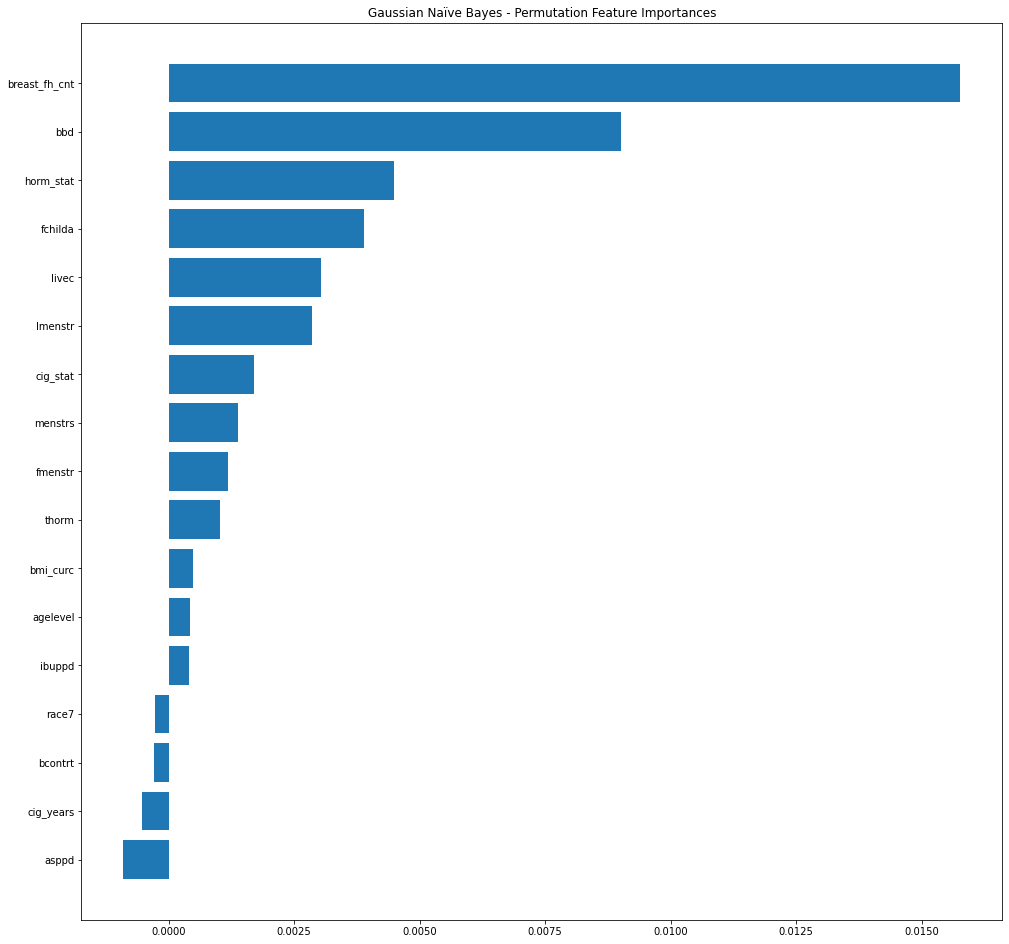

In [182]:
display_pfi_figure(gnb_over_pfi.importances_mean, X_test.columns, 'Gaussian Naïve Bayes')

Display the permutation feature importance in a table

In [183]:
display_pfi_table(gnb_over_pfi.importances_mean, X_test.columns)

,Feature Name,Permutation Feature Importance,Importance Percentage
0,breast_fh_cnt,0.015772,33.09
1,bbd,0.009004,18.89
2,horm_stat,0.004487,9.42
3,fchilda,0.003900,8.18
4,livec,0.003030,6.36
5,lmenstr,0.002856,5.99
6,cig_stat,0.001704,3.58
7,menstrs,0.001378,2.89
8,fmenstr,0.001185,2.49
9,thorm,0.001033,2.17


#### Gaussian Naïve Bayes - Resampled Data
- Run 5 iterations and train and test a GNB model on resampled data
- Get the average performance metrics for the 5 iterations
- Get the average permuataion feature importance for the 5 iterations

Create a function to get the accuracy, recall, precision, f1, f2, and auc scores

In [158]:
def get_score_vals(y_test, y_predicted):   
    accuracy = accuracy_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    f2 = fbeta_score(y_test, y_predicted, beta=2)
    auc = roc_auc_score(y_test, y_predicted)
    score_vals = [accuracy, recall, precision, f1, f2, auc]
    return score_vals

Create a function to get the mean values from multiple arrays

In [159]:
def get_mean_array(array_list):
    sum_array = array_list[0]
    count = len(array_list)
    for i in range(1, count, 1):
        sum_array = np.add(sum_array, array_list[i]) 
    mean_array = np.divide(sum_array, count)
    return mean_array

Create a function to display the score values

In [160]:
def display_mean_metrics(score_vals):
    mean_score_vals = get_mean_array(score_vals)
    metric_names = ['Accuracy', 'Recall', 'Precision', 'F1', 'F2', 'AUC']
    score_table = pd.DataFrame({'Metric': metric_names, 'Average Scores': mean_score_vals})
    display(score_table)    

Create a function to get the permutation feature importance results for either over- or undersampled data for multiple iterations

In [161]:
def get_pfi_results(X, y, sampler_type, classifier_type, random_state, iterations):
    pfi_results = []
    rand_state = random_state
    score_vals = []

    for i in range(iterations):
        rand_state = rand_state + 1
        if sampler_type == 'O':
            sampler = RandomOverSampler(random_state=rand_state)
        else:
            sampler = RandomUnderSampler(random_state=rand_state)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=rand_state, stratify=y_resampled)
        if classifier_type == 'GNB':
            classifier = GaussianNB()
        else:
            classifier = RandomForestClassifier(random_state=rand_state)
        classifier.fit(X_train, y_train)
        y_predicted = classifier.predict(X_test)
        score_vals.append(get_score_vals(y_test, y_predicted))
        pfi = permutation_importance(classifier, X_test, y_test, random_state=rand_state)
        pfi_results.append(pfi)

    display_mean_metrics(score_vals)
    return pfi_results

#### Undersampled Data

Get the permutation feature importance of 5 iterations using undersampled data
- Display the average metric scores for the 5 iterations

In [162]:
pfi_results_under = get_pfi_results(X_clean, y_clean, 'U', 'GNB', RANDOM_STATE, 5)

,Metric,Average Scores
0,Accuracy,0.552244
1,Recall,0.436918
2,Precision,0.568133
3,F1,0.493839
4,F2,0.458016
5,AUC,0.552244


Get an array of the mean permutation feature importance from the 5 iterations

In [163]:
array_list = []
for i in range(len(pfi_results_under)):
    array_list.append(pfi_results_under[i]['importances_mean'])
mean_under_array = get_mean_array(array_list)

Display a figure of the mean permutation feature importance for undersampled data

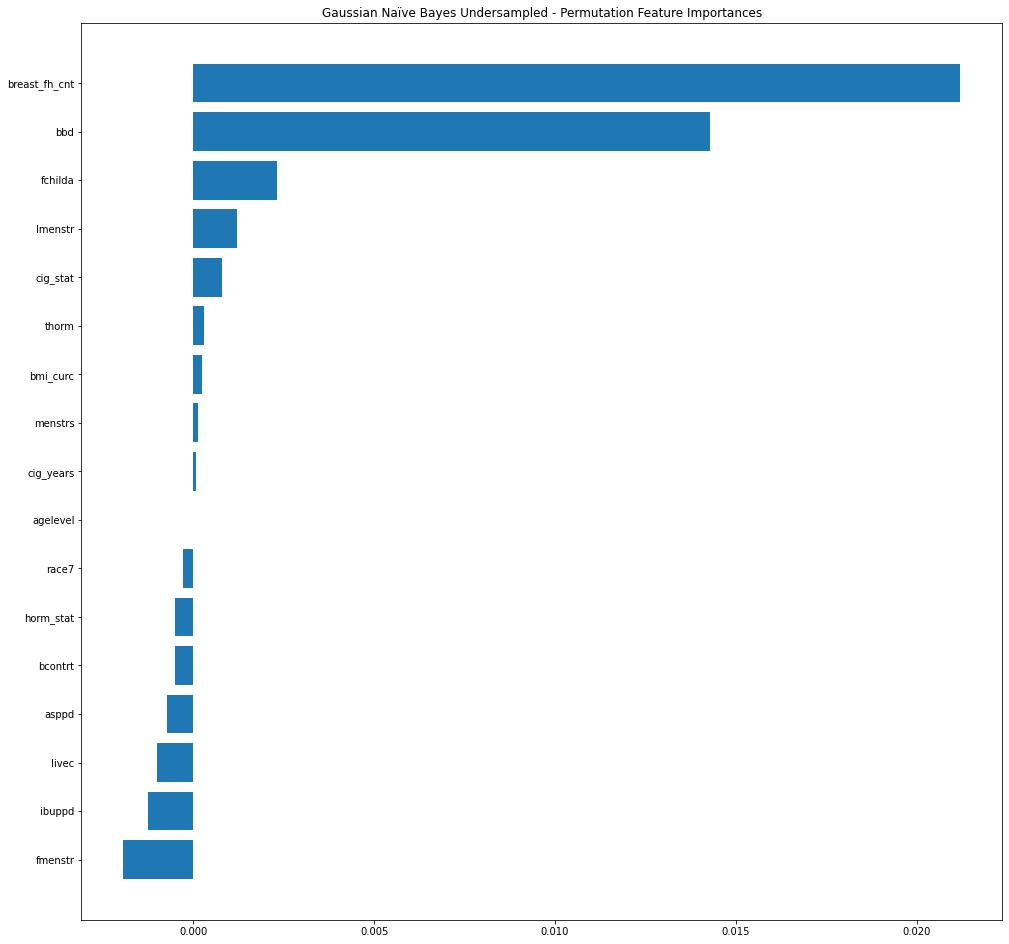

In [164]:
display_pfi_figure(mean_under_array, X_clean.columns, 'Gaussian Naïve Bayes Undersampled')

Display a table of the mean permutation feature importance for undersampled data

In [165]:
display_pfi_table(mean_under_array, X_clean.columns)

,Feature Name,Permutation Feature Importance,Importance Percentage
0,breast_fh_cnt,0.021202,45.31
1,bbd,0.014276,30.51
2,fchilda,0.002320,4.96
3,lmenstr,0.001219,2.61
4,cig_stat,0.000796,1.70
5,thorm,0.000305,0.65
6,bmi_curc,0.000254,0.54
7,menstrs,0.000135,0.29
8,cig_years,0.000068,0.14
9,agelevel,-0.000017,0.04


#### Oversampled Data

Get the permutation feature importance of 5 iterations using oversampled data
- Display the average metric scores for the 5 iterations

In [166]:
pfi_results_over = get_pfi_results(X_clean, y_clean, 'O', 'GNB', RANDOM_STATE, 5)

,Metric,Average Scores
0,Accuracy,0.561237
1,Recall,0.443744
2,Precision,0.580060
3,F1,0.502809
4,F2,0.465620
5,AUC,0.561237


Get an array of the mean permutation feature importance from the 5 iterations

In [167]:
array_list = []
for i in range(len(pfi_results_over)):
    array_list.append(pfi_results_over[i]['importances_mean'])
mean_array = get_mean_array(array_list)

Display a figure of the mean permutation feature importance for oversampled data

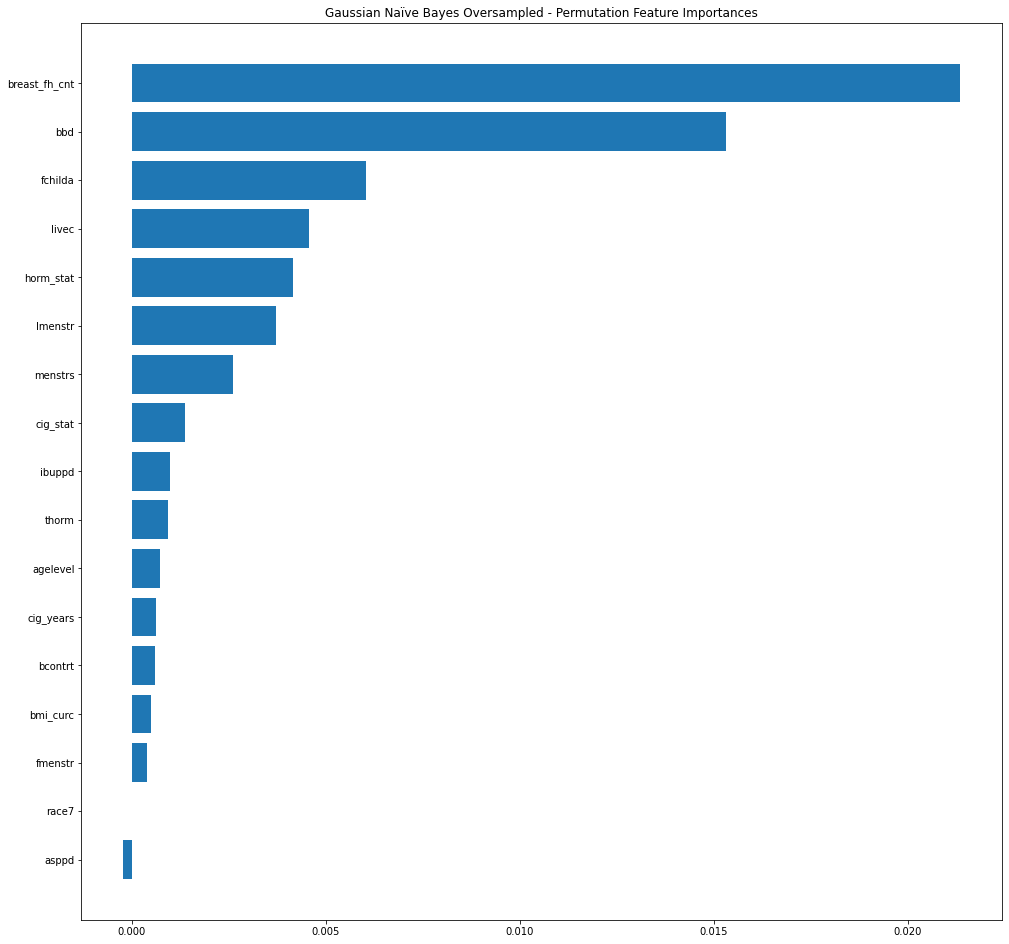

In [168]:
display_pfi_figure(mean_array, X_clean.columns, 'Gaussian Naïve Bayes Oversampled')

Display a table of the mean permutation feature importance for oversampled data

In [169]:
display_pfi_table(mean_array, X_clean.columns)

,Feature Name,Permutation Feature Importance,Importance Percentage
0,breast_fh_cnt,0.021359,33.31
1,bbd,0.015313,23.88
2,fchilda,0.006047,9.43
3,livec,0.004563,7.12
4,horm_stat,0.004155,6.48
5,lmenstr,0.003710,5.78
6,menstrs,0.002601,4.06
7,cig_stat,0.001364,2.13
8,ibuppd,0.000995,1.55
9,thorm,0.000941,1.47


#### Random Forest - Original Data

Get the permutation feature importance of the RF model trained on the undersampled dataset (the model with the second best f1-score)

In [184]:
rf_under_pfi = permutation_importance(best_rf_under, X_test, y_test, random_state=RANDOM_STATE)

Display the permutation feature importance in a figure

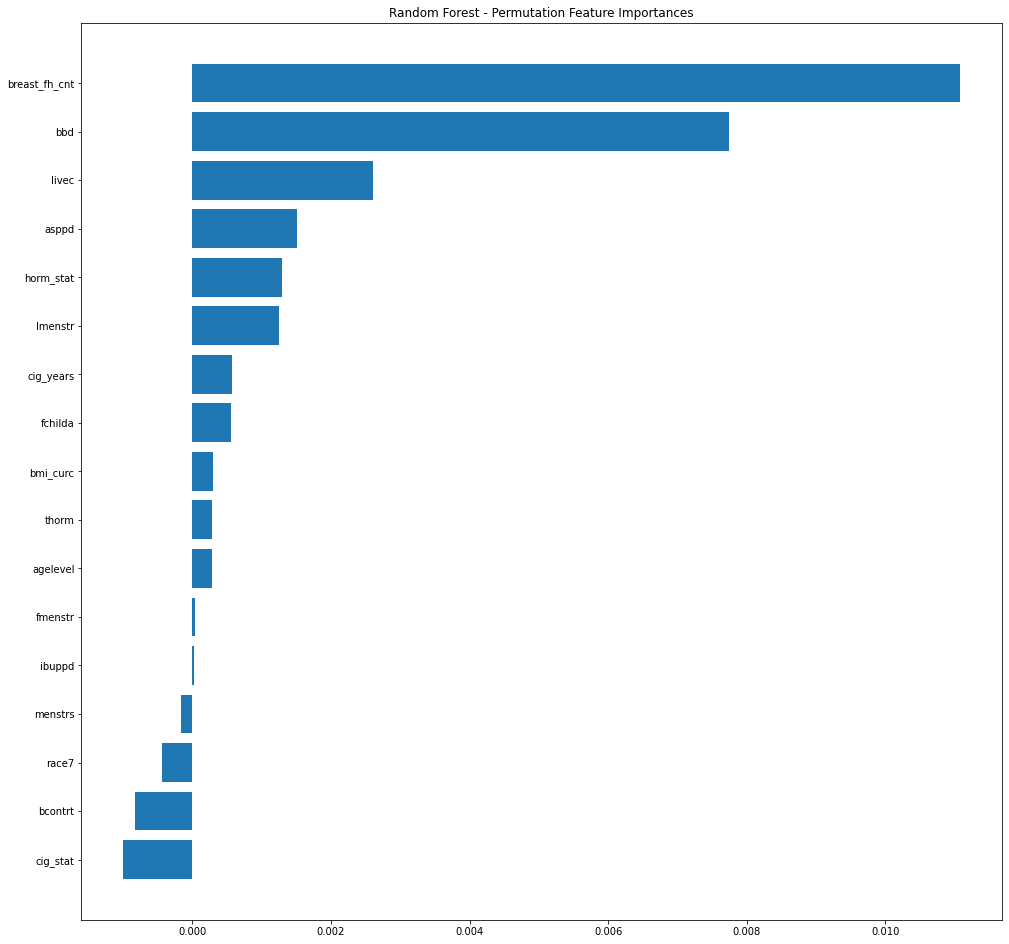

In [185]:
display_pfi_figure(rf_under_pfi.importances_mean, X_test.columns, 'Random Forest')

Display the permutation feature importance in a table

In [186]:
display_pfi_table(rf_under_pfi.importances_mean, X_test.columns)

,Feature Name,Permutation Feature Importance,Importance Percentage
0,breast_fh_cnt,0.011081,36.99
1,bbd,0.007738,25.83
2,livec,0.002605,8.70
3,asppd,0.001505,5.02
4,horm_stat,0.001290,4.30
5,lmenstr,0.001244,4.15
6,cig_years,0.000574,1.92
7,fchilda,0.000556,1.85
8,bmi_curc,0.000306,1.02
9,thorm,0.000290,0.97


#### Random Forest - Resampled Data
- Run 5 iterations and train and test an RF model on resampled data
- Get the average performance metrics for the 5 iterations
- Get the average permuataion feature importance for the 5 iterations

#### Undersampled Data
Get the permutation feature importance of 5 iterations using undersampled data
- Display the average metric scores for the 5 iterations

In [173]:
pfi_results_under = get_pfi_results(X_clean, y_clean, 'U', 'RF', RANDOM_STATE, 5)

,Metric,Average Scores
0,Accuracy,0.526503
1,Recall,0.510754
2,Precision,0.527416
3,F1,0.518889
4,F2,0.513963
5,AUC,0.526503


Get an array of the mean permutation feature importance from the 5 iterations

In [174]:
array_list = []
for i in range(len(pfi_results_under)):
    array_list.append(pfi_results_under[i]['importances_mean'])
mean_under_array = get_mean_array(array_list)

Display a figure of the mean permutation feature importance for undersampled data

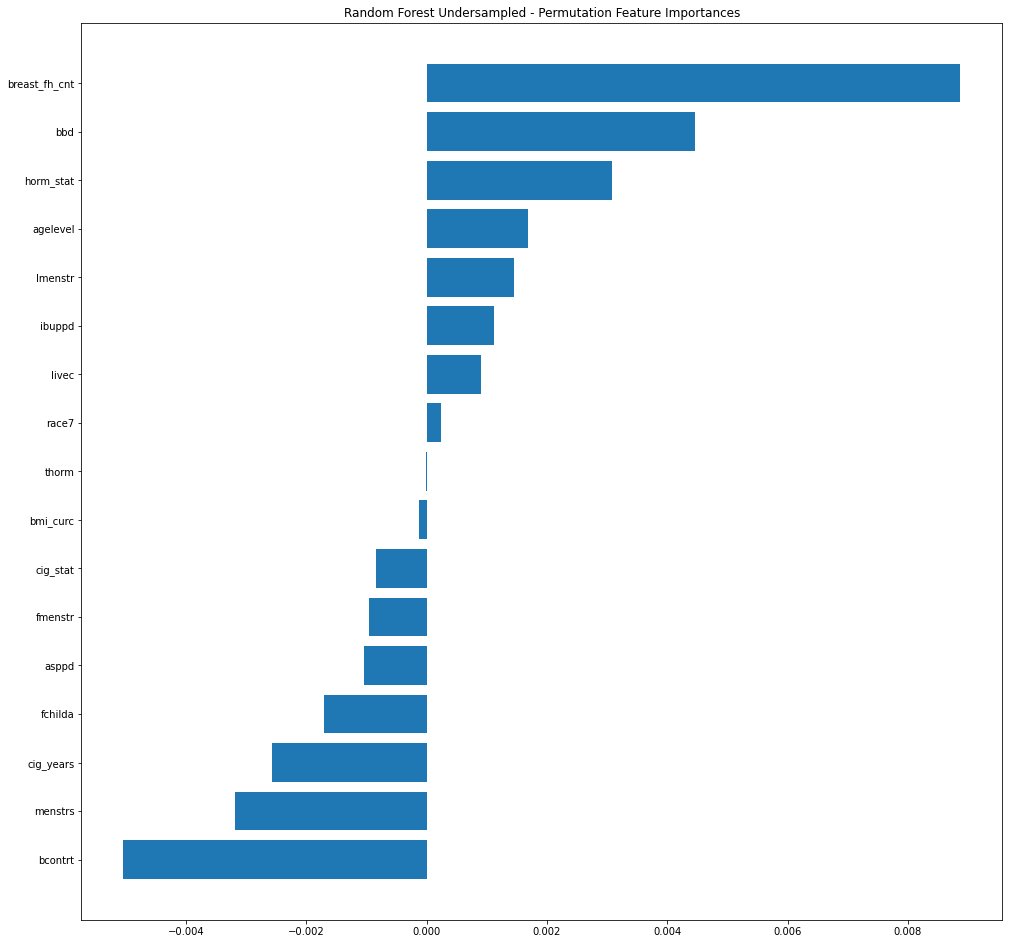

In [187]:
display_pfi_figure(mean_under_array, X_test.columns, 'Random Forest Undersampled')

Display the permutation feature importance in a table

In [176]:
display_pfi_table(mean_under_array, X_test.columns)

,Feature Name,Permutation Feature Importance,Importance Percentage
0,breast_fh_cnt,0.008874,23.77
1,bbd,0.004454,11.93
2,horm_stat,0.003082,8.26
3,agelevel,0.001677,4.49
4,lmenstr,0.001456,3.90
5,ibuppd,0.001118,2.99
6,livec,0.000898,2.40
7,race7,0.000237,0.64
8,thorm,-0.000017,0.05
9,bmi_curc,-0.000135,0.36


#### Oversampled Data

Get the permutation feature importance of 5 iterations using oversampled data
- Display the average metric scores for the 5 iterations

In [177]:
pfi_results_over = get_pfi_results(X_clean, y_clean, 'O', 'RF', RANDOM_STATE, 5)

,Metric,Average Scores
0,Accuracy,0.994368
1,Recall,0.999935
2,Precision,0.988924
3,F1,0.994399
4,F2,0.997714
5,AUC,0.994368


Get an array of the mean permutation feature importance from the 5 iterations

In [178]:
array_list = []
for i in range(len(pfi_results_over)):
    array_list.append(pfi_results_over[i]['importances_mean'])
mean_array = get_mean_array(array_list)

Display a figure of the mean permutation feature importance for oversampled data

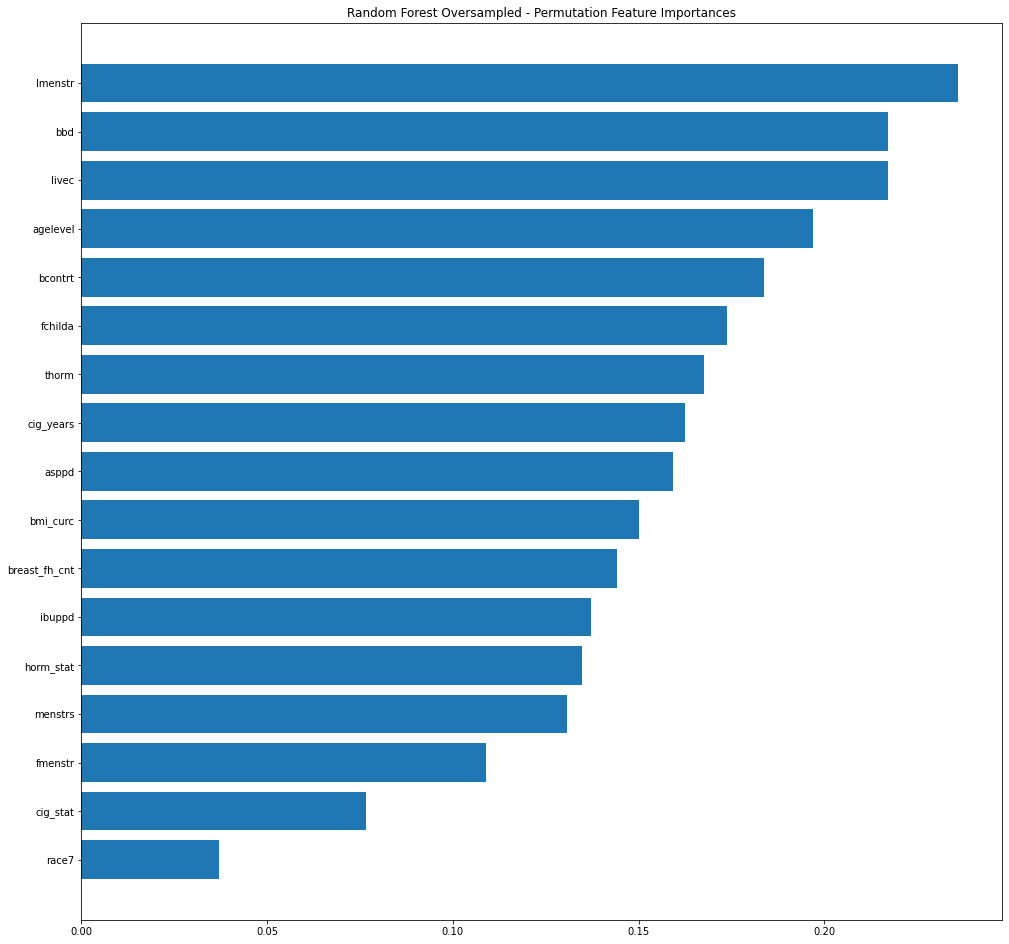

In [179]:
display_pfi_figure(mean_array, X_clean.columns, 'Random Forest Oversampled')

Display a table of the mean permutation feature importance for oversampled data

In [180]:
display_pfi_table(mean_array, X_clean.columns)

,Feature Name,Permutation Feature Importance,Importance Percentage
0,lmenstr,0.236055,8.96
1,bbd,0.217258,8.25
2,livec,0.217004,8.24
3,agelevel,0.197010,7.48
4,bcontrt,0.183777,6.98
5,fchilda,0.173733,6.60
6,thorm,0.167512,6.36
7,cig_years,0.162353,6.16
8,asppd,0.159232,6.05
9,bmi_curc,0.150044,5.70
